## **Types of LLM's (Based on Input and Output Processing)**

Encoder-Only Models: BERT and its variants (e.g., RoBERTa) focus on understanding and encoding input text into meaningful representations, useful for tasks like classification and entity recognition.

Decoder-Only Models: GPT series falls into this category, where the model generates text by predicting the next word in a sequence, making them well-suited for creative writing and conversation.

Encoder-Decoder Models: T5 (Text-To-Text Transfer Transformer) and BART (Bidirectional and Auto-Regressive Transformers) combine both encoding and decoding processes. They’re versatile, used for tasks like translation, summarization, and question answering.

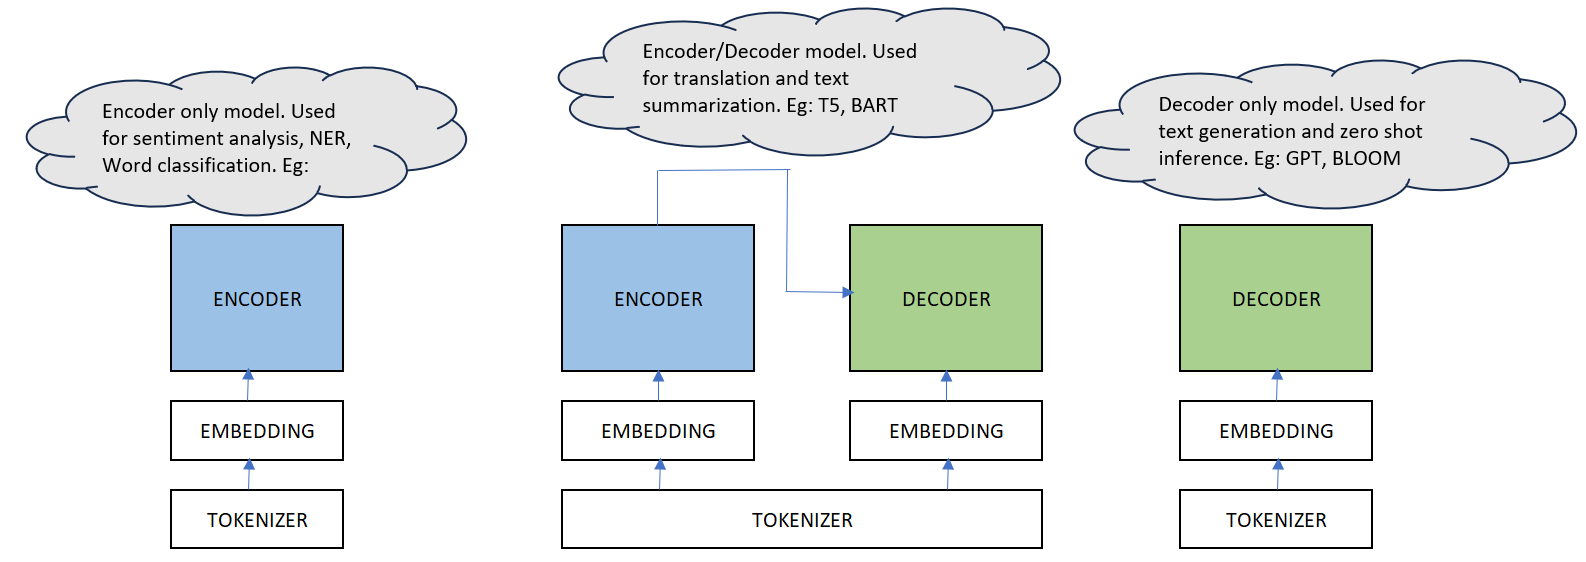

## **Pre-trained vs. Fine-tuned Models:**

Pre-trained Models: These are trained on large datasets and have general knowledge across various domains (e.g., GPT-3). They can be adapted to specific tasks through fine-tuning.

Fine-tuned Models: Pre-trained models that have been further trained on domain-specific data to improve performance on particular tasks, such as legal document analysis or medical text interpretation.

## **Customising Foundational Models**

**1. Prompt Engineering**

Prompt engineering involves designing and refining the input prompts provided to a pre-trained model to achieve desired responses or behaviors. It leverages the model’s existing knowledge and capabilities by crafting prompts that guide the model to produce relevant outputs.

**2. Fine-Tuning**

Fine-tuning involves additional training of a pre-trained model on a specialized dataset tailored to a specific domain or task. This process adjusts the model’s weights to improve its performance on targeted applications.

In [24]:
import torch
import evaluate
import numpy as np
import pandas as pd
import time
from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoModelForSeq2SeqLM, AutoTokenizer,GenerationConfig
from transformers import TrainingArguments, Trainer
from transformers import set_seed

import warnings
warnings.filterwarnings('ignore')

## **Prompt Engineering**

We will evaluate the performance of various LLM models by using a set of dialogue texts and their corresponding summaries. By comparing these human-created summaries with the outputs generated by the models under different prompt configurations, we can assess the accuracy and quality of the model's summaries. This comparison will help us validate how well each model performs in summarizing dialogue content based on the prompts provided.

In [4]:
hugging_face_data = 'knkarthick/dialogsum'
data = load_dataset(hugging_face_data)

Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [15]:
# Sample Dialogue 1
print('Dialogues:',data['test'][45]['dialogue'])
print('-'*100)
print('Summary: ',data['test'][45]['summary'])

Dialogues: #Person1#: Would you like to go to the party tonight?
#Person2#: Whose party?
#Person1#: Ruojia's. Don't you know that? Ruojia has got married.
#Person2#: What! Is she really? I can't believe it!
#Person1#: Yes. Yesterday.
#Person2#: Good gracious. That's incredible! I feel so happy for her!
#Person1#: Yes, me too.
#Person2#: But how do you know that?
#Person1#: I saw the news from her twitter. And she sent an email about it.
#Person2#: What? I didn't receive it!
#Person1#: Maybe you should check your email.
#Person2#: Oh yes, I find it. Tonight at her home. Will you bring something?
#Person1#: Yes, a pair of wineglasses and a card to wish her happy marriage.
#Person2#: I will buy a tea set.
----------------------------------------------------------------------------------------------------
Summary:  #Person1# tells #Person2# that Ruojia is married and will have a party tonight. #Person2#'s surprised to know that. They will bring their gifts to bless her.


In [16]:
# Sample Dialogue 1
print('Dialogues:',data['test'][120]['dialogue'])
print('-'*100)
print('Summary: ',data['test'][120]['summary'])

Dialogues: #Person1#: Hello, I bought the pendant in your shop, just before. 
#Person2#: Yes. Thank you very much. 
#Person1#: Now I come back to the hotel and try to show it to my friend, the pendant is broken, I'm afraid. 
#Person2#: Oh, is it? 
#Person1#: Would you change it to a new one? 
#Person2#: Yes, certainly. You have the receipt? 
#Person1#: Yes, I do. 
#Person2#: Then would you kindly come to our shop with the receipt by 10 o'clock? We will replace it. 
#Person1#: Thank you so much. 
----------------------------------------------------------------------------------------------------
Summary:  #Person1# wants to change the broken pendant in #Person2#'s shop.


### Model

In [25]:
model_name = 'google/flan-t5-base'
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

### Inference

In [53]:
dialog = data['test'][100]['dialogue']
summary = data['test'][100]['summary']
print(dialog)

#Person1#: OK, that's a cut! Let's start from the beginning, everyone.
#Person2#: What was the problem that time?
#Person1#: The feeling was all wrong, Mike. She is telling you that she doesn't want to see you any more, but I want to get more anger from you. You're acting hurt and sad, but that's not how your character would act in this situation.
#Person2#: But Jason and Laura have been together for three years. Don't you think his reaction would be one of both anger and sadness?
#Person1#: At this point, no. I think he would react the way most guys would, and then later on, we would see his real feelings.
#Person2#: I'm not so sure about that.
#Person1#: Let's try it my way, and you can see how you feel when you're saying your lines. After that, if it still doesn't feel right, we can try something else.


In [54]:
prompt = dialog
print(prompt)
print('*'*100)

input_ = tokenizer(prompt,return_tensors='pt')

output = model.generate(input_['input_ids'],max_new_tokens=50)

print('Human Summary:',summary)
print()
print('Model Summary:',tokenizer.decode(output[0],skip_special_tokens=True))

#Person1#: OK, that's a cut! Let's start from the beginning, everyone.
#Person2#: What was the problem that time?
#Person1#: The feeling was all wrong, Mike. She is telling you that she doesn't want to see you any more, but I want to get more anger from you. You're acting hurt and sad, but that's not how your character would act in this situation.
#Person2#: But Jason and Laura have been together for three years. Don't you think his reaction would be one of both anger and sadness?
#Person1#: At this point, no. I think he would react the way most guys would, and then later on, we would see his real feelings.
#Person2#: I'm not so sure about that.
#Person1#: Let's try it my way, and you can see how you feel when you're saying your lines. After that, if it still doesn't feel right, we can try something else.
****************************************************************************************************
Human Summary: #Person1# and Mike have a disagreement on how to act out a scene. #

### Zero shot inference

In [60]:
prompt = dialog + 'Whats going on?'

print(prompt)
print('*'*100)

input_ = tokenizer(prompt,return_tensors='pt')

output = model.generate(input_['input_ids'],max_new_tokens=50)

print('Human Summary:',summary)
print()
print('Model Summary:',tokenizer.decode(output[0],skip_special_tokens=True))

#Person1#: OK, that's a cut! Let's start from the beginning, everyone.
#Person2#: What was the problem that time?
#Person1#: The feeling was all wrong, Mike. She is telling you that she doesn't want to see you any more, but I want to get more anger from you. You're acting hurt and sad, but that's not how your character would act in this situation.
#Person2#: But Jason and Laura have been together for three years. Don't you think his reaction would be one of both anger and sadness?
#Person1#: At this point, no. I think he would react the way most guys would, and then later on, we would see his real feelings.
#Person2#: I'm not so sure about that.
#Person1#: Let's try it my way, and you can see how you feel when you're saying your lines. After that, if it still doesn't feel right, we can try something else.Whats going on?
****************************************************************************************************
Human Summary: #Person1# and Mike have a disagreement on how to act

### One Shot inference

In [61]:
prompt = (data['test'][90]['dialogue']+'\n\n'+'whats going on?: '+data['test'][90]['summary']+'\n\n'+
         dialog+'\n\n'+'Whats going on?: ')

print(prompt)
print('*'*100)

input_ = tokenizer(prompt,return_tensors='pt')

output = model.generate(input_['input_ids'],max_new_tokens=50)

print('Human Summary:',summary)
print()
print('Model Summary:',tokenizer.decode(output[0],skip_special_tokens=True))

#Person1#: What's wrong with you, Mr. Polly?
#Person2#: What's wrong? I want a break from this horrible job.
#Person1#: Then, buy a bottle of soft drink.
#Person2#: Would you like to buy a bottle for me in the shop?
#Person1#: It's a problem, because my boss is in that shop now.
#Person2#: Ok, I will go there myself.
#Person1#: Sorry, Mr. Polly.
#Person2#: It doesn't matter. Oh, God, I have only four dollars in my wallet. Is that possible for me to buy one?
#Person1#: Have a try.

whats going on?: Mr. Polly is tired and wants a break from work. #Person1# cannot buy a bottle of soft drink for him.

#Person1#: OK, that's a cut! Let's start from the beginning, everyone.
#Person2#: What was the problem that time?
#Person1#: The feeling was all wrong, Mike. She is telling you that she doesn't want to see you any more, but I want to get more anger from you. You're acting hurt and sad, but that's not how your character would act in this situation.
#Person2#: But Jason and Laura have been toge

### Few Shot Inference

In [63]:
prompt = (data['test'][120]['dialogue']+'\n\n'+'whats going on?: '+data['test'][120]['summary']+'\n\n'+
          data['test'][130]['dialogue']+'\n\n'+'whats going on?: '+data['test'][130]['summary']+'\n\n'+
         dialog+'\n\n'+'Whats going on?: ')

print(prompt)
print('*'*100)

input_ = tokenizer(prompt,return_tensors='pt')

output = model.generate(input_['input_ids'],max_new_tokens=50)

print('Human Summary:',summary)
print()
print('Model Summary:',tokenizer.decode(output[0],skip_special_tokens=True))

#Person1#: Hello, I bought the pendant in your shop, just before. 
#Person2#: Yes. Thank you very much. 
#Person1#: Now I come back to the hotel and try to show it to my friend, the pendant is broken, I'm afraid. 
#Person2#: Oh, is it? 
#Person1#: Would you change it to a new one? 
#Person2#: Yes, certainly. You have the receipt? 
#Person1#: Yes, I do. 
#Person2#: Then would you kindly come to our shop with the receipt by 10 o'clock? We will replace it. 
#Person1#: Thank you so much. 

whats going on?: #Person1# wants to change the broken pendant in #Person2#'s shop.

#Person1#: Don't tell me you're bored already?
#Person2#: Well, yeah, I am.
#Person1#: We just got here. You will have to find a way to entertain yourself then.
#Person2#: What can I do? There are just a bunch of boring people giving boring speeches.
#Person1#: Too bad. I have to sit through it, so you do, too. Even if it's a little boring, it's important for me to be here. I have to listen carefully, take notes and then 